# IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import metrics
import matplotlib.pyplot as plt


# DATA PREPROCESSING

In [ ]:
data = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')


In [ ]:
# Gender: 1 = Male, 0 = Female
data['gender'] = data['gender'].map({1: 'Male', 0: 'Female'})

# Chest pain type: 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
chestpain_map = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}
data['chestpain'] = data['chestpain'].map(chestpain_map)

# Fasting blood sugar: 1 = true (> 120 mg/dl), 0 = false (<= 120 mg/dl)
data['fastingbloodsugar'] = data['fastingbloodsugar'].map({1: 'true', 0: 'false'})

# Resting electrocardiogram results: 0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy
restingrelectro_map = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'}
data['restingrelectro'] = data['restingrelectro'].map(restingrelectro_map)

# Exercise induced angina: 1 = yes, 0 = no
data['exerciseangia'] = data['exerciseangia'].map({1: 'yes', 0: 'no'})

# Slope of the peak exercise ST segment: 1 = upsloping, 2 = flat, 3 = downsloping
slope_map = {0 : "no slope", 1: 'upsloping', 2: 'flat', 3: 'downsloping'}
data['slope'] = data['slope'].map(slope_map)

# Target: 1 = Presence of Heart Disease, 0 = Absence of Heart Disease
data['target'] = data['target'].map({1: 'Presence of Heart Disease', 0: 'Absence of Heart Disease'})


In [ ]:
data.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [ ]:
# Number of NaN values to add
# Number of new rows to add
num_new_rows = 200
print("rows 1 ", data.shape[0], "null values", data.isnull().sum())
# Create a new DataFrame with 200 rows of NaN values, matching the columns of the existing DataFrame
new_data = pd.DataFrame(np.nan, index=np.random.choice(data.index, size=num_new_rows, replace=False), columns=data.columns)
print("rows 2 ", new_data.shape[0], "null values", new_data.isnull().sum())
# Append the new DataFrame to the existing one
data = pd.concat([data, new_data])
print("rows 3 ", data.shape[0], "null values", data.isnull().sum())
data.dropna(inplace=True)
print("rows 4 ", data.shape[0], "null values", data.isnull().sum())

rows 1  1000 null values patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64
rows 2  200 null values patientid            200
age                  200
gender               200
chestpain            200
restingBP            200
serumcholestrol      200
fastingbloodsugar    200
restingrelectro      200
maxheartrate         200
exerciseangia        200
oldpeak              200
slope                200
noofmajorvessels     200
target               200
dtype: int64
rows 3  1200 null values patientid            200
age                  200
gender               200
chestpain            200
restingBP            200
serumcholestrol      200
fastingbloodsugar    200
restingrelectro      200
maxheartrate         200
exe

In [ ]:
data.to_csv('Cardiovascular_Disease_Dataset_Extended_FINAL.csv', index=False)

In [ ]:
#the final dataset we get is with the null values
final_data=pd.read_csv('/content/Cardiovascular_Disease_Dataset_Extended_FINAL.csv')#this datset contains null values

In [ ]:
final_data

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368.0,53.0,Male,non-anginal pain,171.0,0.0,False,ST-T wave abnormality,147.0,no,5.3,downsloping,3.0,Presence of Heart Disease
1,119250.0,40.0,Male,typical angina,94.0,229.0,False,ST-T wave abnormality,115.0,no,3.7,upsloping,1.0,Absence of Heart Disease
2,119372.0,49.0,Male,non-anginal pain,133.0,142.0,False,normal,202.0,yes,5.0,upsloping,0.0,Absence of Heart Disease
3,132514.0,43.0,Male,typical angina,138.0,295.0,True,ST-T wave abnormality,153.0,no,3.2,flat,2.0,Presence of Heart Disease
4,146211.0,31.0,Male,atypical angina,199.0,0.0,False,left ventricular hypertrophy,136.0,no,5.3,downsloping,2.0,Presence of Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544.0,48.0,Male,non-anginal pain,139.0,349.0,False,left ventricular hypertrophy,183.0,yes,5.6,flat,2.0,Presence of Heart Disease
996,9953423.0,47.0,Male,asymptomatic,143.0,258.0,True,ST-T wave abnormality,98.0,yes,5.7,upsloping,0.0,Absence of Heart Disease
997,9965859.0,69.0,Male,typical angina,156.0,434.0,True,normal,196.0,no,1.4,downsloping,1.0,Presence of Heart Disease
998,9988507.0,45.0,Male,atypical angina,186.0,417.0,False,ST-T wave abnormality,117.0,yes,5.9,downsloping,2.0,Presence of Heart Disease


Dummies or mapping

In [ ]:
# Gender: Male = 1, Female = 0
final_data['gender'] = final_data['gender'].map({'Male': 1, 'Female': 0})

# Chest pain type: typical angina = 0, atypical angina = 1, non-anginal pain = 2, asymptomatic = 3
chestpain_map_reverse = {v: k for k, v in chestpain_map.items()}
final_data['chestpain'] = final_data['chestpain'].map(chestpain_map_reverse)

# Resting electrocardiogram results: normal = 0, ST-T wave abnormality = 1, left ventricular hypertrophy = 2
restingrelectro_map_reverse = {v: k for k, v in restingrelectro_map.items()}
final_data['restingrelectro'] = final_data['restingrelectro'].map(restingrelectro_map_reverse)

# Exercise induced angina: yes = 1, no = 0
final_data['exerciseangia'] = final_data['exerciseangia'].map({'yes': 1, 'no': 0})

# Slope of the peak exercise ST segment: upsloping = 1, flat = 2, downsloping = 3, no slope = 0
slope_map_reverse = {v: k for k, v in slope_map.items()}
final_data['slope'] = final_data['slope'].map(slope_map_reverse)

# Target: Presence of Heart Disease = 1, Absence of Heart Disease = 0
final_data['target'] = final_data['target'].map({'Presence of Heart Disease': 1, 'Absence of Heart Disease': 0})



In [ ]:

final_data['fastingbloodsugar'] = final_data['fastingbloodsugar'].map({True: 1, False: 0})

In [ ]:
final_data['fastingbloodsugar'].value_counts()

,count
fastingbloodsugar,
0,704
1,296


# EXPLORATORY DATA ANALYSIS AND VISUALISATIONS

In [ ]:
df = final_data

# Display column names
print("Feature names in the dataset:")
print(df.columns)


Feature names in the dataset:
Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')


In [ ]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   float64
 1   age                1000 non-null   float64
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   float64
 5   serumcholestrol    1000 non-null   float64
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   float64
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   float64
 13  target             1000 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 109.5 KB


In [ ]:
# add dtypes
df.dtypes

,0
patientid,float64
age,float64
gender,int64
chestpain,int64
restingBP,float64
serumcholestrol,float64
fastingbloodsugar,int64
restingrelectro,int64
maxheartrate,float64
exerciseangia,int64


<ipython-input-17-731ef4a2694e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='Set2', ax=axes1[0])
<ipython-input-17-731ef4a2694e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='restingBP', data=df, palette='Set2', ax=axes1[3])
<ipython-input-17-731ef4a2694e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='serumcholestrol', data=df, palette='coolwarm', ax=axes1[4])


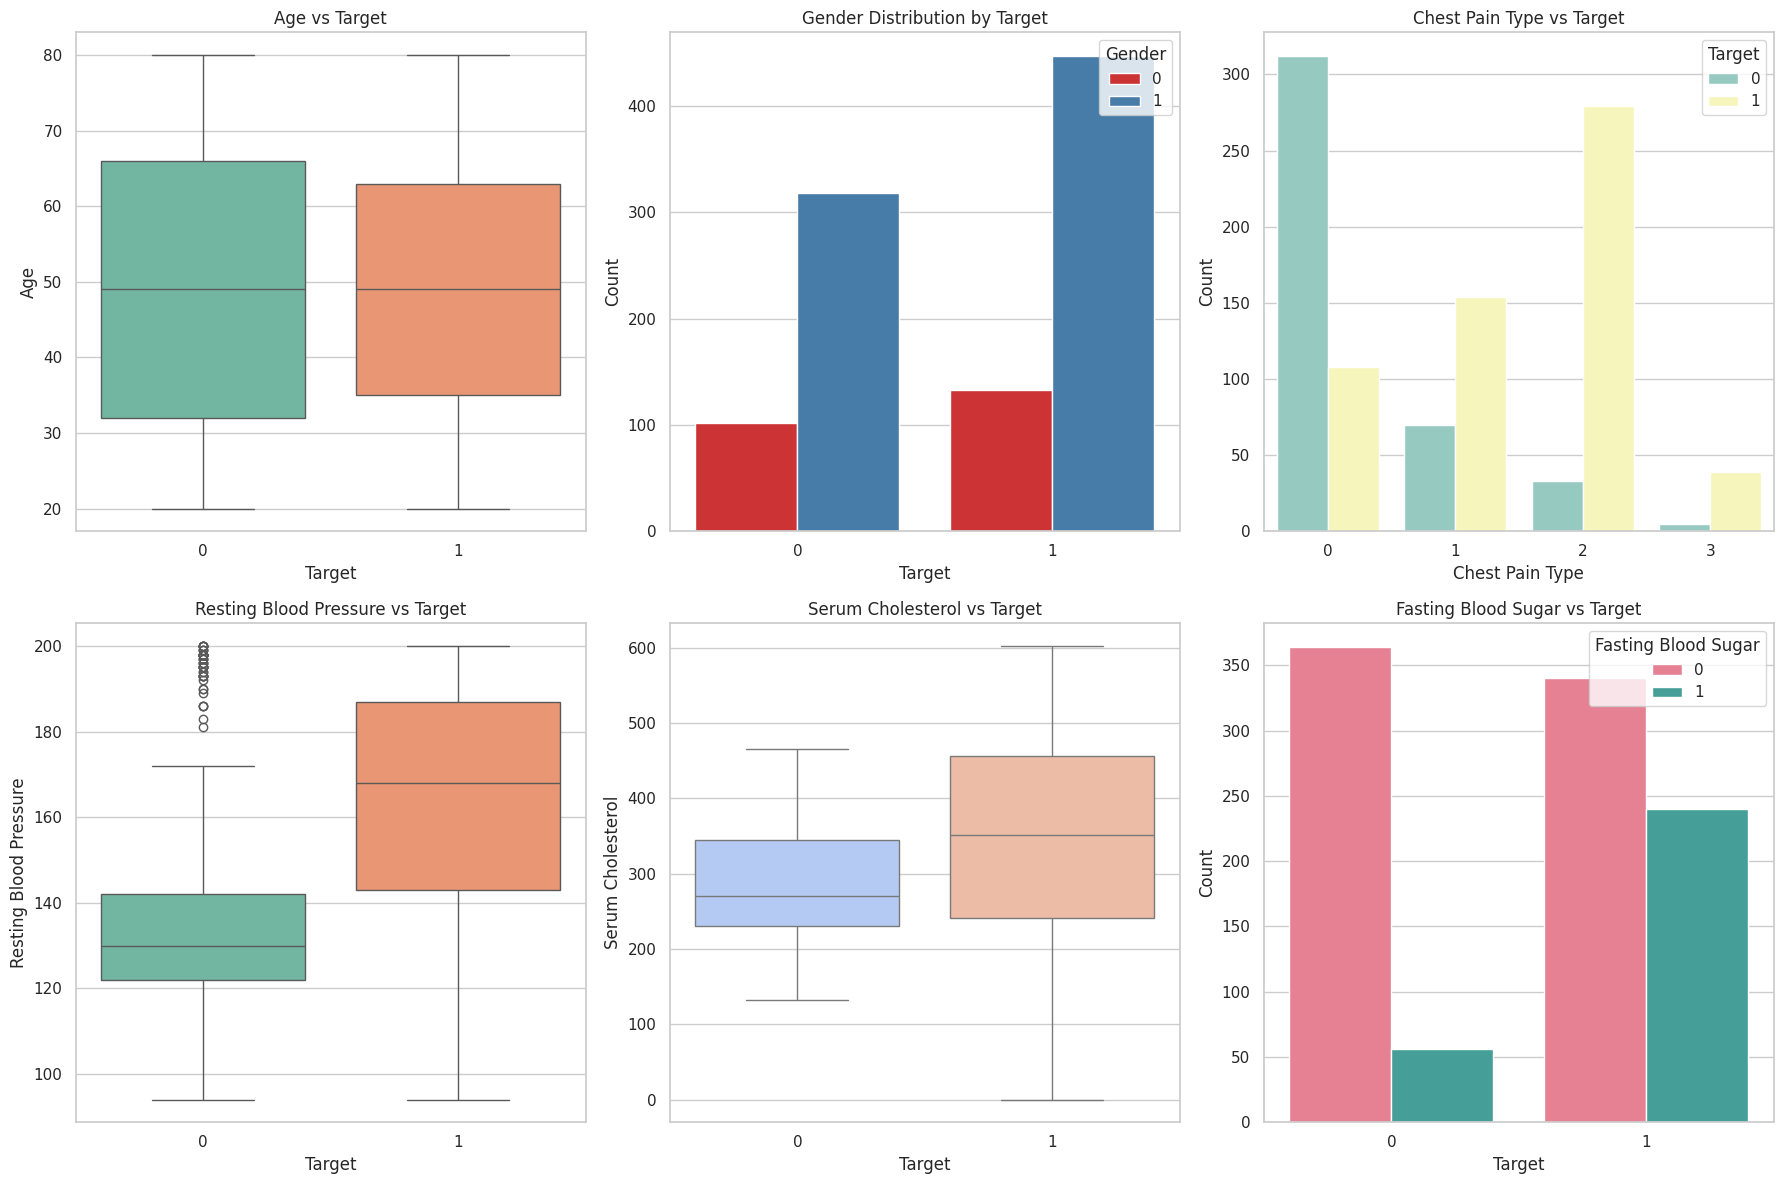

<ipython-input-17-731ef4a2694e>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='maxheartrate', data=df, palette='Spectral', ax=axes2[1])
<ipython-input-17-731ef4a2694e>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, palette='viridis', ax=axes2[3])


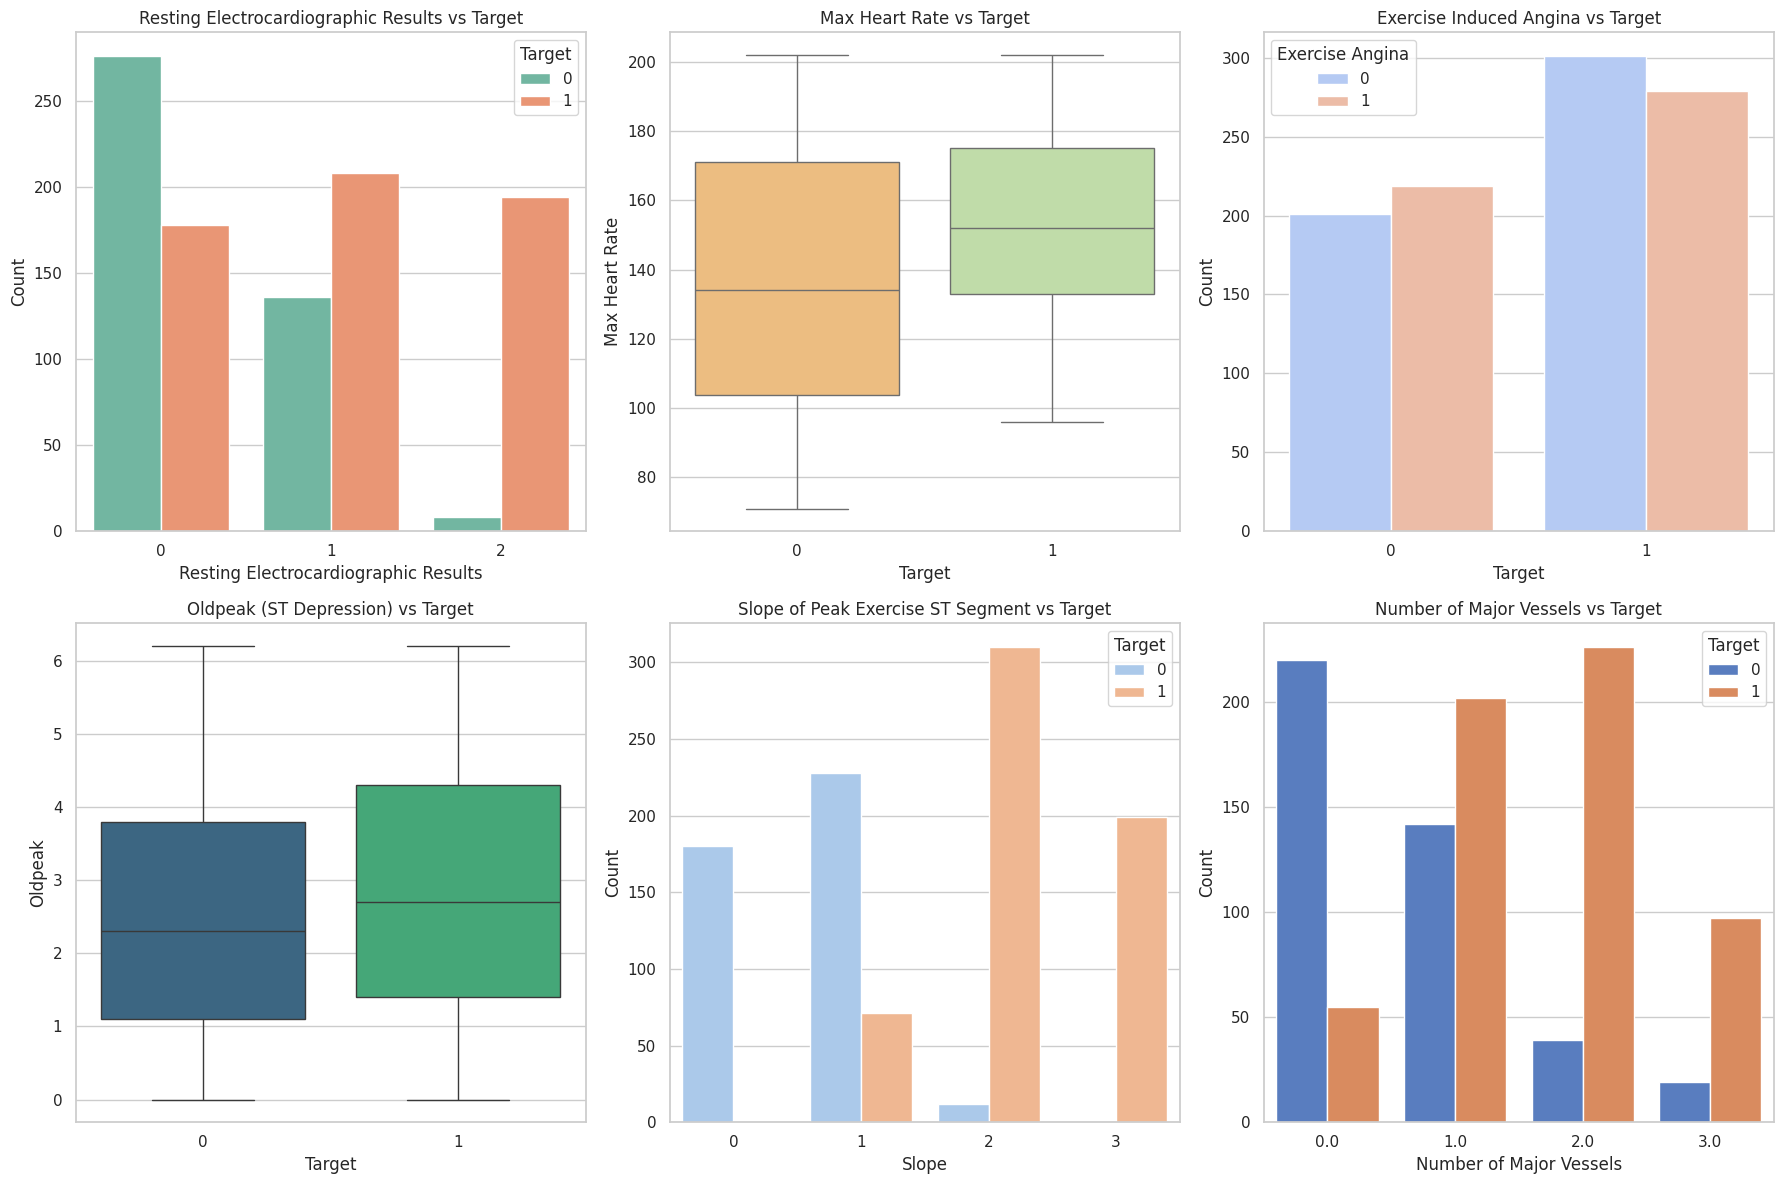

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = final_data

# Set the style for plots
sns.set(style="whitegrid")

# First image: Create a 2x3 grid for the first 6 plots
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 12))
axes1 = axes1.flatten()

# 1. Relationship between Age and Target
sns.boxplot(x='target', y='age', data=df, palette='Set2', ax=axes1[0])
axes1[0].set_title('Age vs Target')
axes1[0].set_xlabel('Target')
axes1[0].set_ylabel('Age')

# 2. Relationship between Gender and Target
sns.countplot(x='target', hue='gender', data=df, palette='Set1', ax=axes1[1])
axes1[1].set_title('Gender Distribution by Target')
axes1[1].set_xlabel('Target')
axes1[1].set_ylabel('Count')
axes1[1].legend(title='Gender', loc='upper right')

# 3. Relationship between Chest Pain Type and Target
sns.countplot(x='chestpain', hue='target', data=df, palette='Set3', ax=axes1[2])
axes1[2].set_title('Chest Pain Type vs Target')
axes1[2].set_xlabel('Chest Pain Type')
axes1[2].set_ylabel('Count')
axes1[2].legend(title='Target')

# 4. Relationship between Resting Blood Pressure and Target
sns.boxplot(x='target', y='restingBP', data=df, palette='Set2', ax=axes1[3])
axes1[3].set_title('Resting Blood Pressure vs Target')
axes1[3].set_xlabel('Target')
axes1[3].set_ylabel('Resting Blood Pressure')

# 5. Relationship between Serum Cholesterol and Target
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='coolwarm', ax=axes1[4])
axes1[4].set_title('Serum Cholesterol vs Target')
axes1[4].set_xlabel('Target')
axes1[4].set_ylabel('Serum Cholesterol')

# 6. Relationship between Fasting Blood Sugar and Target
sns.countplot(x='target', hue='fastingbloodsugar', data=df, palette='husl', ax=axes1[5])
axes1[5].set_title('Fasting Blood Sugar vs Target')
axes1[5].set_xlabel('Target')
axes1[5].set_ylabel('Count')
axes1[5].legend(title='Fasting Blood Sugar')

# Adjust layout for the first image
plt.tight_layout()

# Show the first plot
plt.show()


# Second image: Create another 2x3 grid for the next 6 plots
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 12))
axes2 = axes2.flatten()

# 7. Relationship between Resting Electrocardiographic Results and Target
sns.countplot(x='restingrelectro', hue='target', data=df, palette='Set2', ax=axes2[0])
axes2[0].set_title('Resting Electrocardiographic Results vs Target')
axes2[0].set_xlabel('Resting Electrocardiographic Results')
axes2[0].set_ylabel('Count')
axes2[0].legend(title='Target')

# 8. Relationship between Max Heart Rate and Target
sns.boxplot(x='target', y='maxheartrate', data=df, palette='Spectral', ax=axes2[1])
axes2[1].set_title('Max Heart Rate vs Target')
axes2[1].set_xlabel('Target')
axes2[1].set_ylabel('Max Heart Rate')

# 9. Relationship between Exercise Induced Angina and Target
sns.countplot(x='target', hue='exerciseangia', data=df, palette='coolwarm', ax=axes2[2])
axes2[2].set_title('Exercise Induced Angina vs Target')
axes2[2].set_xlabel('Target')
axes2[2].set_ylabel('Count')
axes2[2].legend(title='Exercise Angina')

# 10. Relationship between Oldpeak (ST Depression) and Target
sns.boxplot(x='target', y='oldpeak', data=df, palette='viridis', ax=axes2[3])
axes2[3].set_title('Oldpeak (ST Depression) vs Target')
axes2[3].set_xlabel('Target')
axes2[3].set_ylabel('Oldpeak')

# 11. Relationship between Slope of Peak Exercise ST Segment and Target
sns.countplot(x='slope', hue='target', data=df, palette='pastel', ax=axes2[4])
axes2[4].set_title('Slope of Peak Exercise ST Segment vs Target')
axes2[4].set_xlabel('Slope')
axes2[4].set_ylabel('Count')
axes2[4].legend(title='Target')

# 12. Relationship between Number of Major Vessels and Target
sns.countplot(x='noofmajorvessels', hue='target', data=df, palette='muted', ax=axes2[5])
axes2[5].set_title('Number of Major Vessels vs Target')
axes2[5].set_xlabel('Number of Major Vessels')
axes2[5].set_ylabel('Count')
axes2[5].legend(title='Target')

# Adjust layout for the second image
plt.tight_layout()

# Show the second plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = final_data

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display correlation of each feature with the target variable
print("Correlation with target:")
print(correlation_matrix['target'].sort_values(ascending=False))

# Get the top 3 features with the highest correlation to target
top_features = correlation_matrix['target'].abs().sort_values(ascending=False).index[1:4]
print("Top features with highest correlation to target:", top_features)

"""Insights:-Features like slope, chest pain, and number of major vessels are the most relevant for predicting the target,
while variables like gender, age, and patient ID may be less useful in this context. This could help in feature selection
and model optimization for prediction."""



Correlation with target:
target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
patientid           -0.005637
exerciseangia       -0.039874
Name: target, dtype: float64
Top features with highest correlation to target: Index(['slope', 'chestpain', 'noofmajorvessels'], dtype='object')


Correlation with target:
                     target
target             1.000000
slope              0.797358
chestpain          0.554228
noofmajorvessels   0.489866
restingBP          0.482387
restingrelectro    0.426837
fastingbloodsugar  0.303233
maxheartrate       0.228343
serumcholestrol    0.195340
oldpeak            0.098053
gender             0.015769
age                0.008356
patientid         -0.005637
exerciseangia     -0.039874


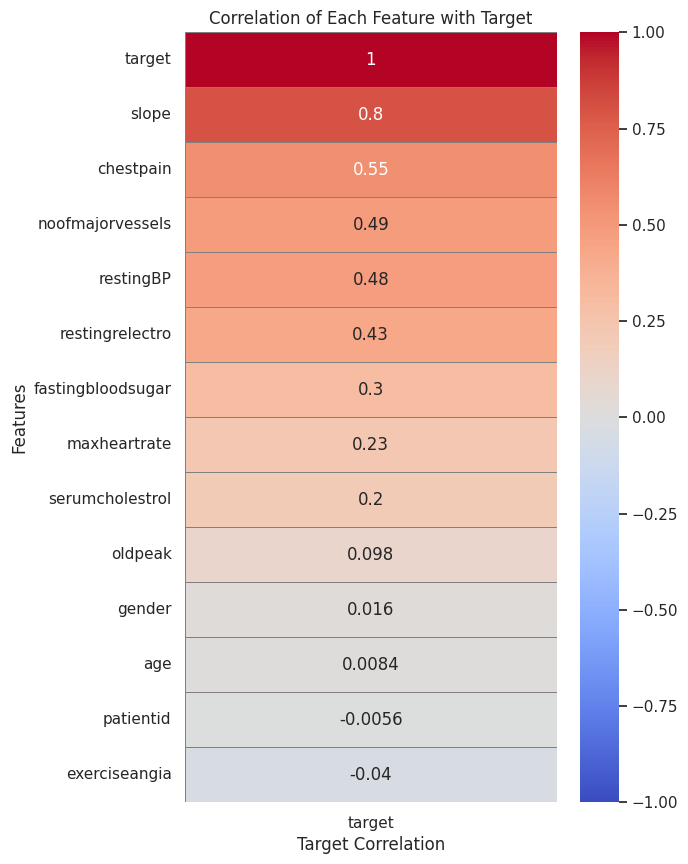

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# Compute the correlation matrix only on numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

# Display correlation of each feature with the target variable
target_correlation = correlation_matrix[['target']].sort_values(by='target', ascending=False)
print("Correlation with target:")
print(target_correlation)

# Visualize the correlation with target in a heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')
plt.title('Correlation of Each Feature with Target')
plt.xlabel('Target Correlation')
plt.ylabel('Features')
plt.show()


Correlation Matrix:

                   patientid       age    gender  chestpain  restingBP  \
patientid           1.000000  0.004978 -0.031263  -0.009679  -0.020926   
age                 0.004978  1.000000 -0.024717   0.037731  -0.016126   
gender             -0.031263 -0.024717  1.000000   0.035402  -0.069727   
chestpain          -0.009679  0.037731  0.035402   1.000000   0.222267   
restingBP          -0.020926 -0.016126 -0.069727   0.222267   1.000000   
serumcholestrol     0.053464  0.035439 -0.120759   0.174731   0.126523   
fastingbloodsugar   0.022331  0.049732  0.023560   0.232059   0.192063   
restingrelectro    -0.003667  0.067736 -0.046634   0.256316   0.219887   
maxheartrate       -0.036486 -0.040092  0.064606   0.114496   0.095569   
exerciseangia       0.014338 -0.037581 -0.051746  -0.027376  -0.046545   
oldpeak            -0.013825 -0.026020  0.331457   0.101345  -0.004225   
slope              -0.010128 -0.015334 -0.051957   0.472731   0.376711   
noofmajorvessels 

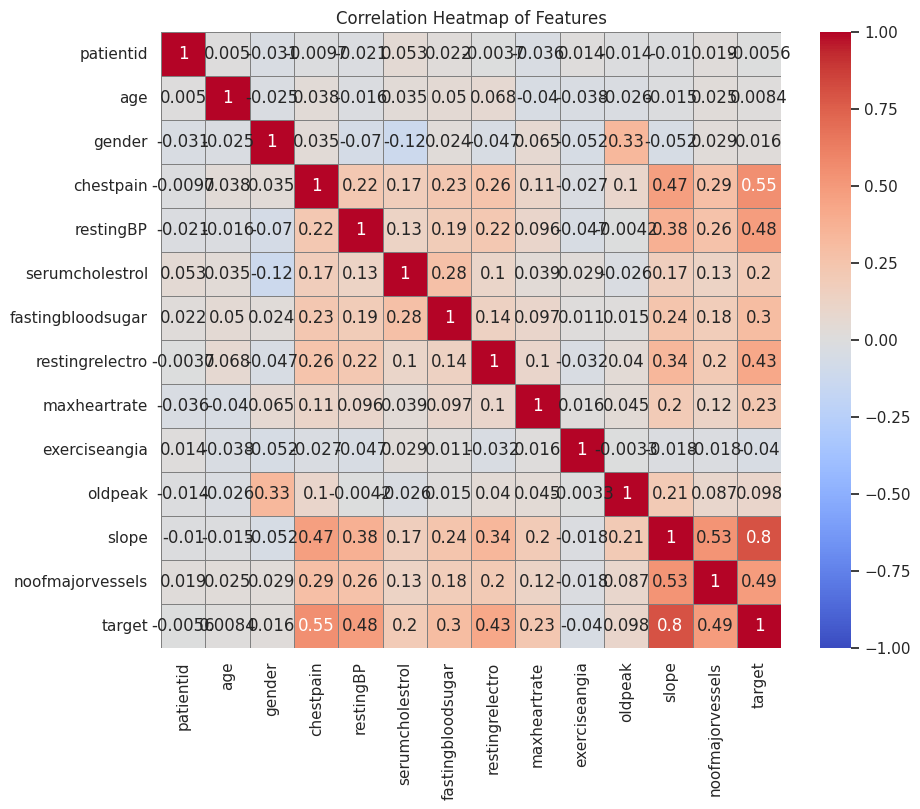

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Cardiovascular_Disease_Dataset.csv'
df = pd.read_csv(file_path)

# Compute the correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray')

# Set title and show the plot
plt.title('Correlation Heatmap of Features')
plt.show()


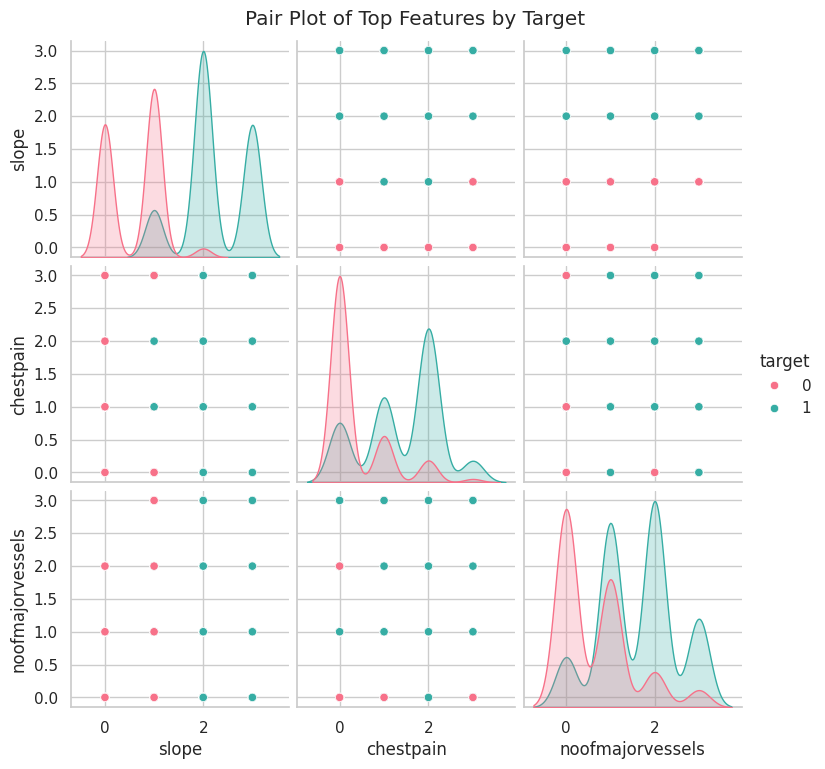

In [ ]:
# Joint Plot between each pair of top features (pairwise plot for top features)
sns.pairplot(df, hue='target', vars=top_features, palette='husl')
plt.suptitle('Pair Plot of Top Features by Target', y=1.02)
plt.show()

"""Insights from the given pair plot:-

Slope: Higher slope values are mostly seen in target 1, while lower values are more common in target 0, making slope a strong distinguishing feature.

Chest Pain: Higher chest pain levels (2 and 3) are more associated with target 1, while target 0 has a broader spread, indicating a potential link with higher chest pain values for target 1.

Number of Major Vessels: Lower values (0 or 1) correlate with target 1, while higher values (2 or 3) align more with target 0, suggesting fewer major vessels is an indicator for target 1."""


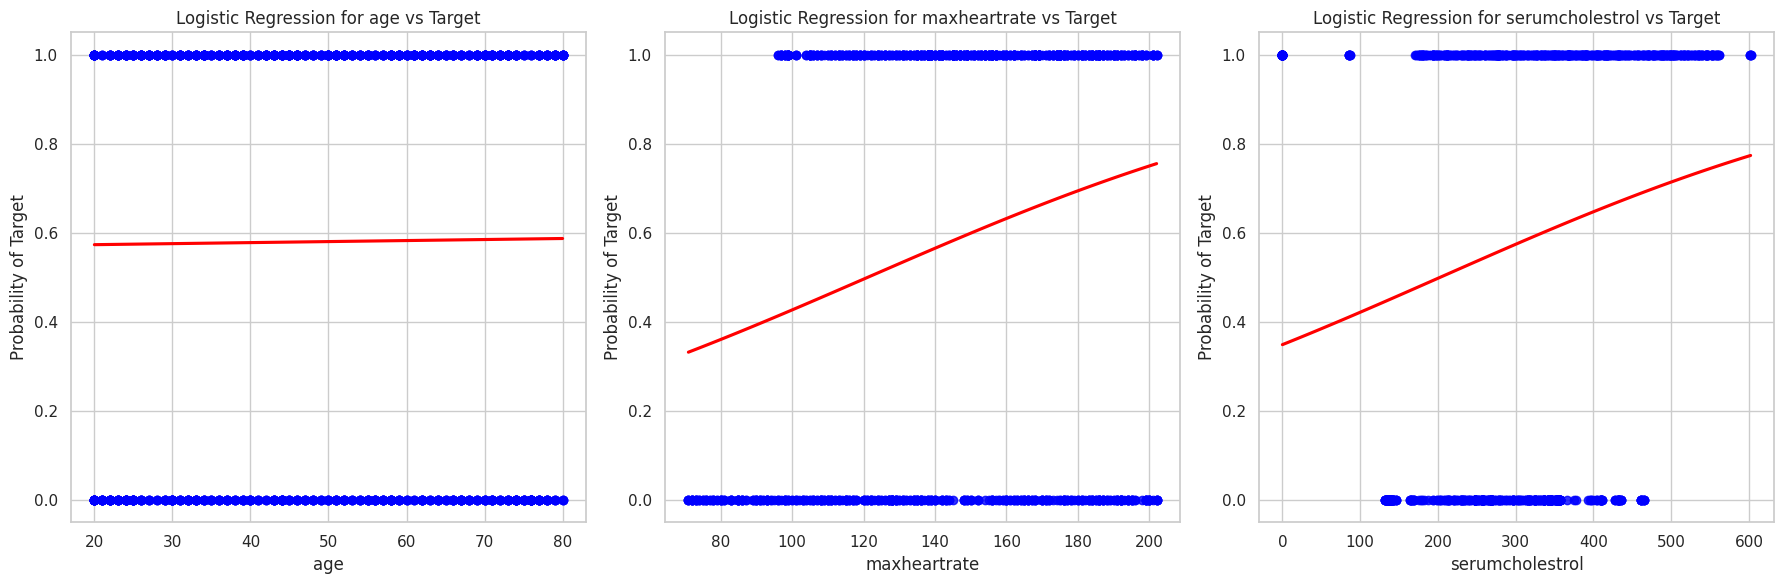

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the top numeric features (assuming 'top_features' contains the relevant features)
top_features = ['age', 'maxheartrate', 'serumcholestrol']  # Example features

# Set the style for plots
sns.set(style="whitegrid")

# Create a grid of subplots to fit all plots in one image (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each top feature and create the logistic regression plot
for i, feature in enumerate(top_features):
    sns.regplot(x=feature, y='target', data=df, logistic=True, ci=None,
                scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_title(f'Logistic Regression for {feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Probability of Target')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

"""Insights from the below Regression Plot:-
Age: The probability of the target remains nearly constant with changes in age, suggesting that age does not significantly influence the target outcome.
Max Heart Rate: As max heart rate increases, the probability of the target (likely indicating the presence of a condition) also increases. This indicates a positive relationship between max heart rate and the target.
Serum Cholesterol: Higher serum cholesterol levels are associated with a higher probability of the target, showing a positive correlation between cholesterol levels and the target outcome.
    In summary, max heart rate and serum cholesterol show positive relationships with the target, while age has minimal influence."""


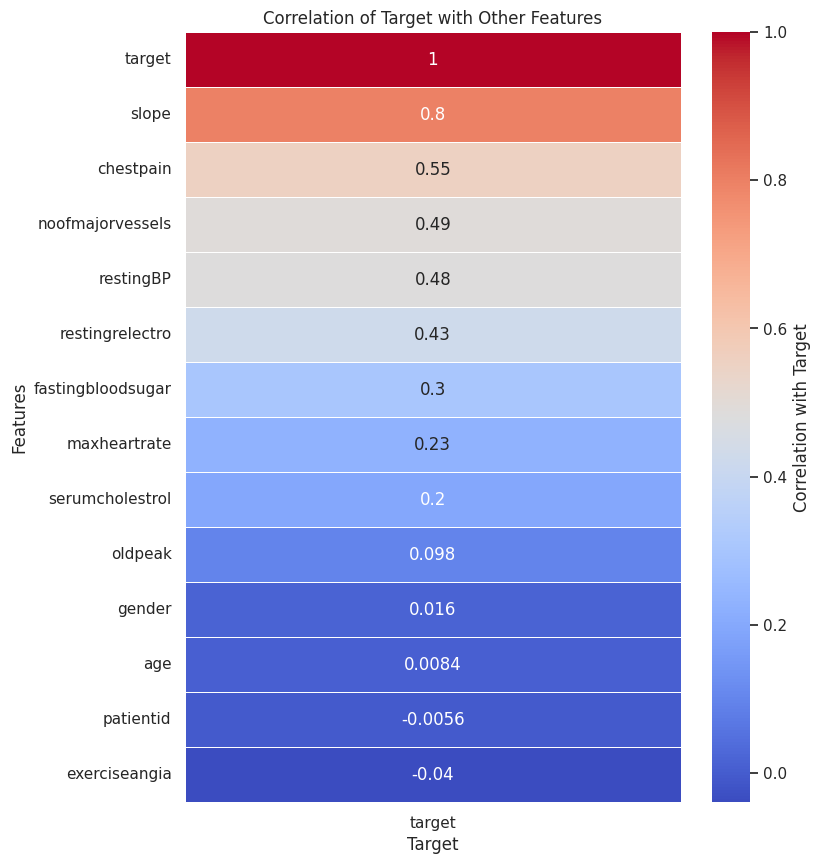

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(file_path)

# Step 1: Compute the correlation matrix
correlation_matrix = df.corr()

# Step 2: Extract only the target's correlation with other features
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlation with Target'})
plt.title('Correlation of Target with Other Features')
plt.xlabel('Target')
plt.ylabel('Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


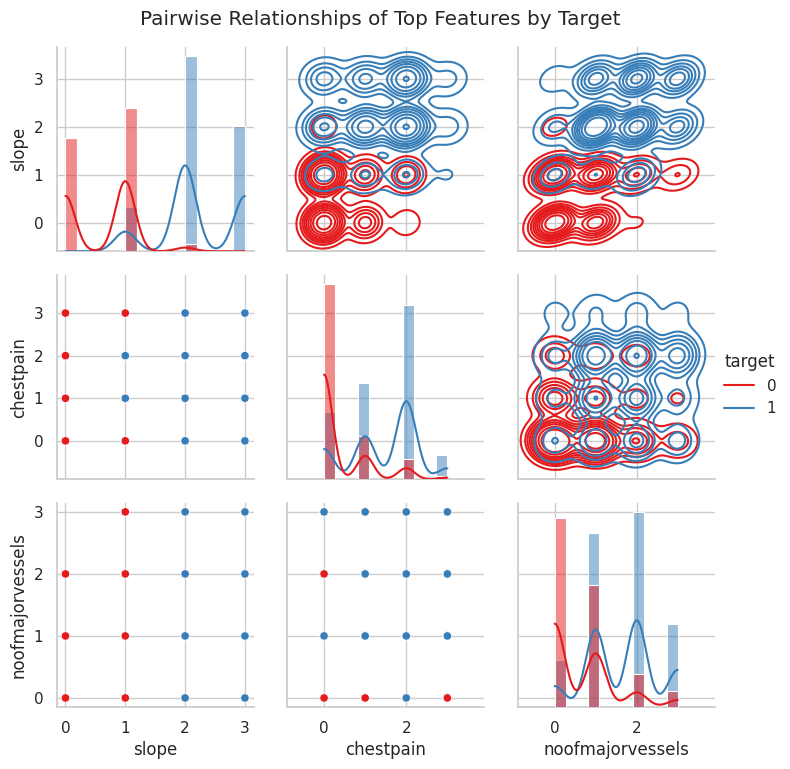

In [ ]:
# PairGrid for Pairwise Relationships of Top Features
sns.set(style="whitegrid")
g = sns.PairGrid(df, vars=top_features, hue="target", palette="Set1", diag_sharey=False)
g.map_lower(sns.scatterplot)   # Scatter plot for lower triangle
g.map_upper(sns.kdeplot, cmap="Blues")  # KDE plot for upper triangle
g.map_diag(sns.histplot, kde=True)  # Histogram with KDE for diagonal
g.add_legend()

plt.suptitle('Pairwise Relationships of Top Features by Target', y=1.02)
plt.show()


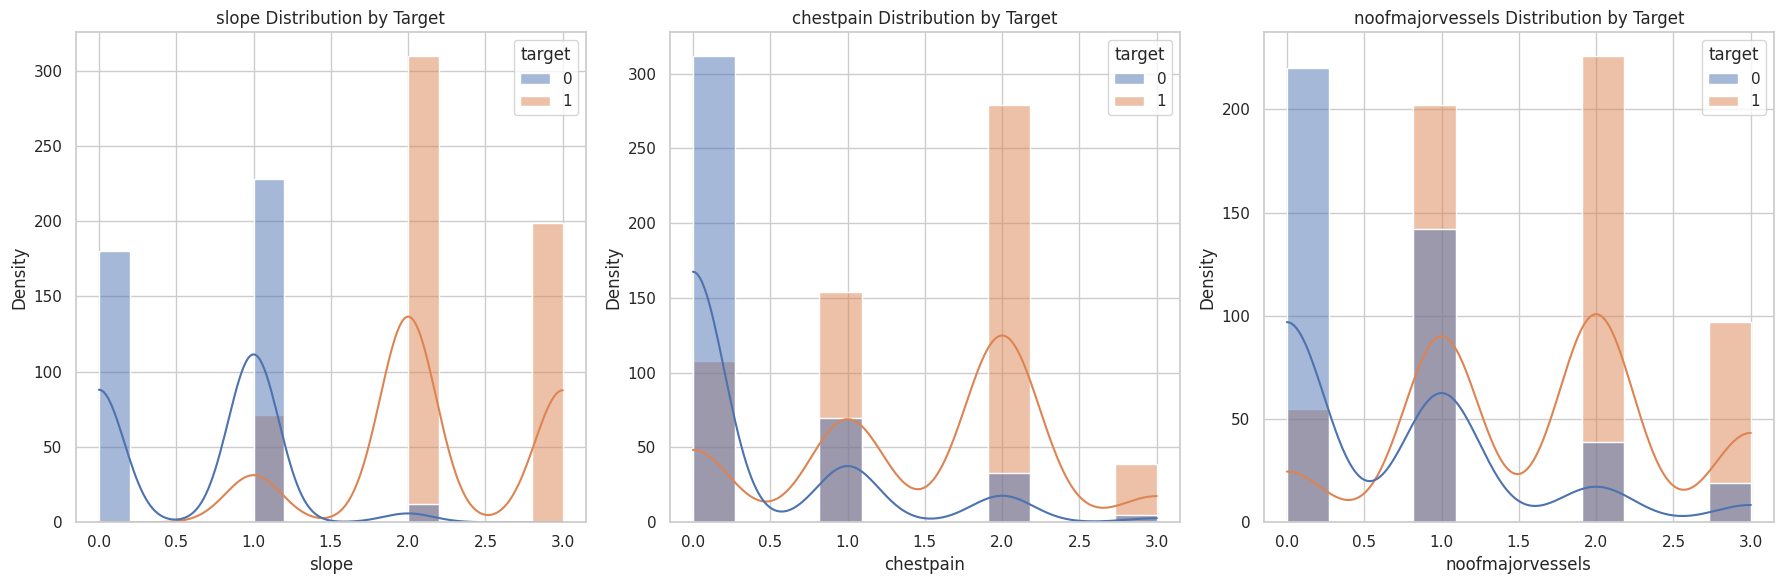

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to analyze
features = ['slope', 'chestpain', 'noofmajorvessels']

# Set the style for plots
sns.set(style="whitegrid")

# Create a 1x3 grid for the plots (one for each feature)
n_features = len(features)
fig, axes = plt.subplots(1, n_features, figsize=(18, 6))

# Loop through each feature and create the histplot in the same figure
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='target', kde=True, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution by Target")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-43-e979fdc0059a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set3', ax=axes[i, 0])
<ipython-input-43-e979fdc0059a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='muted', ax=axes[i, 1])
<ipython-input-43-e979fdc0059a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set3', ax=axes[i, 0])
<ipython-input-43-e979fdc0059a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

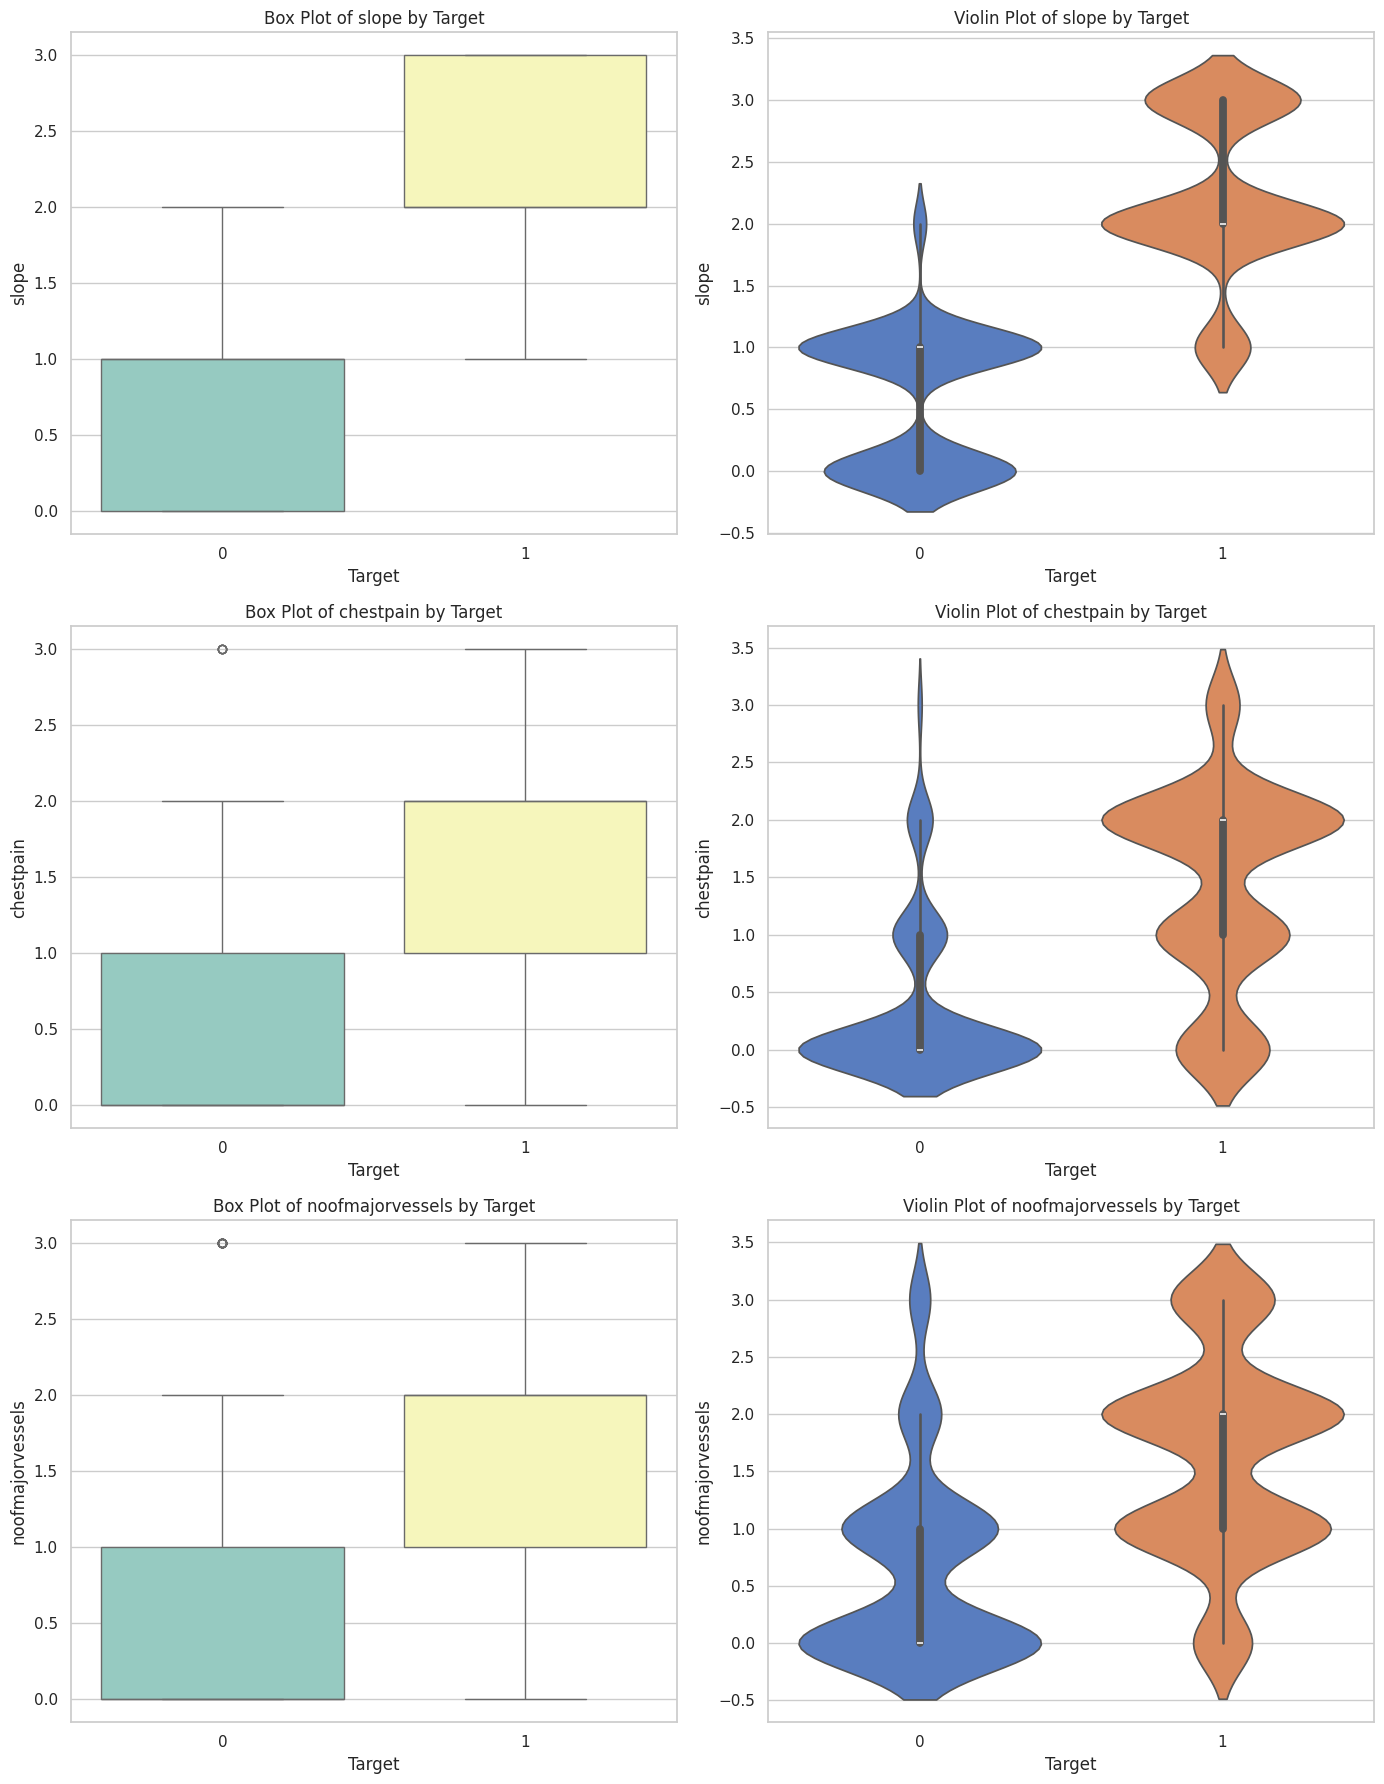

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to analyze (slope, chestpain, noofmajorvessels)
features = ['slope', 'chestpain', 'noofmajorvessels']

# Set the style for plots
sns.set(style="whitegrid")

# Create a 3x2 grid for the plots (box plot and violin plot) for each feature
n_features = len(features)
fig, axes = plt.subplots(n_features, 2, figsize=(14, 6 * n_features))

# Loop through each feature and create the box plot and violin plot in the same figure
for i, feature in enumerate(features):
    # Box Plot
    sns.boxplot(x='target', y=feature, data=df, palette='Set3', ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {feature} by Target')
    axes[i, 0].set_xlabel('Target')
    axes[i, 0].set_ylabel(feature)

    # Violin Plot
    sns.violinplot(x='target', y=feature, data=df, palette='muted', ax=axes[i, 1])
    axes[i, 1].set_title(f'Violin Plot of {feature} by Target')
    axes[i, 1].set_xlabel('Target')
    axes[i, 1].set_ylabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
"""Insights from the box and violin plot:-

Slope: Higher slope values are associated with Target = 1, which may make it a useful predictive feature.

Chestpain: Higher chest pain values seem more common in Target = 1 and could be an indicator of a positive target class.

No. of Major Vessels: A higher number of major vessels affected is more common for Target = 1, making this feature potentially significant for predicting the target.



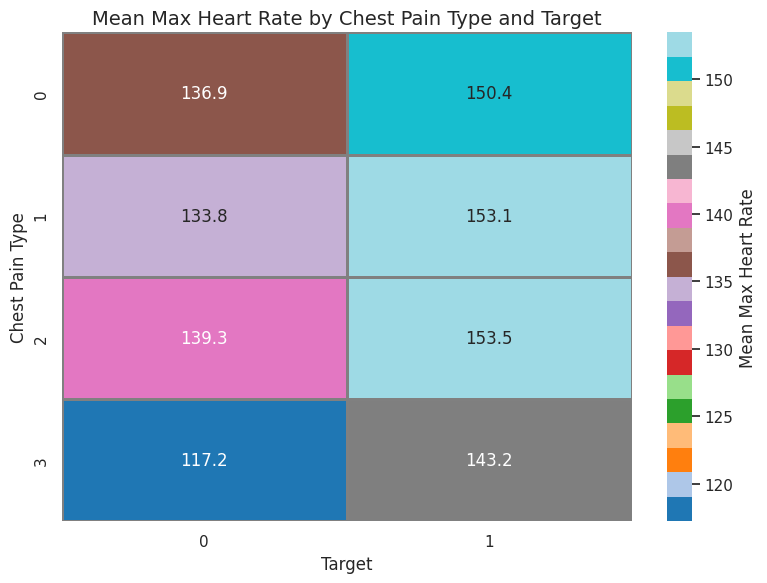

In [ ]:
# Create pivot table with 'chestpain' as rows, 'target' as columns, and mean 'maxheartrate' as values
heatmap_data = df.pivot_table(values='maxheartrate', index='chestpain', columns='target', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,               # Display the data values in each cell
    cmap="tab20",            # Color map
    fmt=".1f",                # Format to one decimal place
    linewidths=1,           # Line width between cells
    linecolor="gray",         # Color of the grid lines
    cbar_kws={'label': 'Mean Max Heart Rate'}  # Label for the color bar
)

# Add title and labels
plt.title('Mean Max Heart Rate by Chest Pain Type and Target', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Chest Pain Type', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjusts layout for better fit
plt.show()


<ipython-input-61-b64c9b437861>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


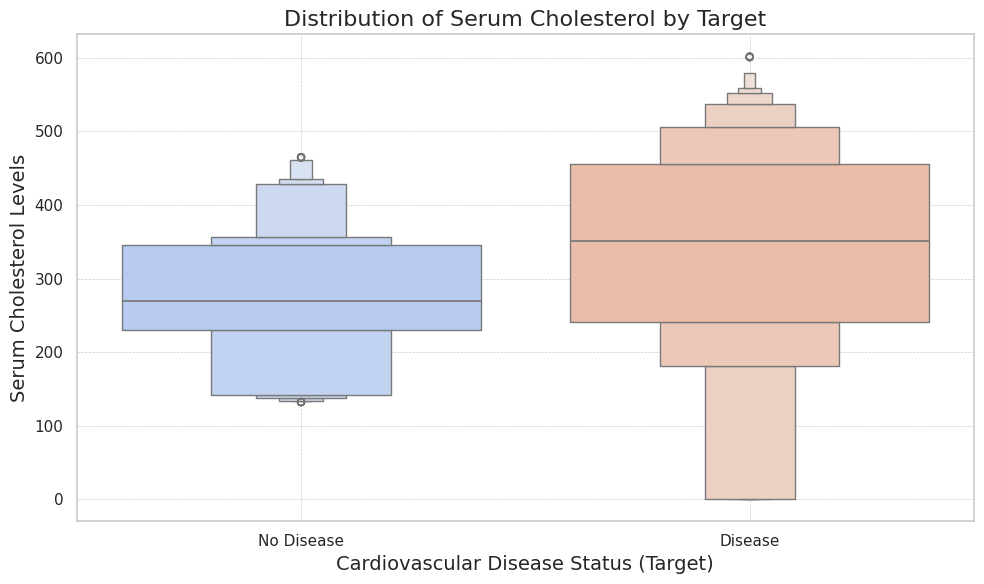

In [ ]:
"""
Boxen Plot reveals the spread and concentration of cholesterol levels, which can indicate
a trend linking high cholesterol with cardiovascular disease.

Stacked Bar Plot shows the distribution of chest pain types across disease statuses,
which can highlight which types of chest pain might be more predictive of cardiovascular disease."""

# Set the style and color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the boxen plot
sns.boxenplot(
    x='target',
    y='serumcholestrol',
    data=df,
    palette='coolwarm',  # Color palette
    linewidth=1,         # Width of the edges
    saturation=0.7       # Saturation for color intensity
)

# Customize the plot
plt.title('Distribution of Serum Cholesterol by Target', fontsize=16)
plt.xlabel('Cardiovascular Disease Status (Target)', fontsize=14)
plt.ylabel('Serum Cholesterol Levels', fontsize=14)
plt.xticks([0, 1], ['No Disease', 'Disease'])  # Label the target classes
plt.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines for readability

# Display plot
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_with_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = ['const'] + list(dataset.columns[1:-1])  # Include the constant column
vif_data["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

# Print the results
print(vif_data)

              Feature        VIF
0               const  63.251087
1                 age   1.016759
2              gender   1.189908
3           chestpain   1.348050
4           restingBP   1.213816
5     serumcholestrol   1.127807
6   fastingbloodsugar   1.172081
7     restingrelectro   1.171613
8        maxheartrate   1.055371
9       exerciseangia   1.009930
10            oldpeak   1.205656
11              slope   1.982605
12   noofmajorvessels   1.413536


# FINAL TRAINING OF ARTIFICIAL NEURAL NETWORK

In [ ]:
dataset = pd.read_csv('/content/Cardiovascular_Disease_Dataset (1).csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #train test split

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
import pickle

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [ ]:
# Function to create an Artificial Neural Network and return the model
def create_ann():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_regularizer = l2(0.02)))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_regularizer = l2(0.02)))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_regularizer = l2(0.02)))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',metrics.Precision(),metrics.Recall(), metrics.AUC()])
    return ann

In [ ]:
import numpy as np

# Initialize K-Fold cross-validation with 5 splits
# shuffle=True ensures that the data is shuffled before splitting, and random_state=42 ensures reproducibility

all_accuracies = []
best_models = []  # List to store best models for each fold

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new ANN model for each fold
    ann = create_ann()

    # Define the ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint(
        f'best_model_fold_{fold}.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )

    # Fit the model with the checkpoint callback
    history = ann.fit(
        x_train_fold,
        y_train_fold,
        batch_size=16,
        epochs=50,
        validation_data=(x_val_fold, y_val_fold),
        callbacks=[checkpoint],
        verbose=1
    )

    # Load the best model for this fold
    best_model = tf.keras.models.load_model(f'best_model_fold_{fold}.keras')
    best_models.append(best_model)

    # Get the last validation accuracy
    val_accuracy = history.history['val_accuracy']
    all_accuracies.append(val_accuracy[-1])

# Calculate average accuracy across folds
average_accuracy = np.mean(all_accuracies)
print(f"Average cross-validation accuracy: {average_accuracy:.4f}")


# test_loss, test_accuracy = best_models[0].evaluate(X_test, y_test)
# print(f"Test accuracy of the best model: {test_accuracy:.4f}")


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5854 - auc: 0.7322 - loss: 1.0527 - precision: 0.7755 - recall: 0.3981 - val_accuracy: 0.7125 - val_auc: 0.8176 - val_loss: 0.9927 - val_precision: 0.8415 - val_recall: 0.6765
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7657 - auc: 0.8373 - loss: 0.9743 - precision: 0.8328 - recall: 0.7448 - val_accuracy: 0.7812 - val_auc: 0.8949 - val_loss: 0.9115 - val_precision: 0.8681 - val_recall: 0.7745
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8001 - auc: 0.8890 - loss: 0.8912 - precision: 0.8403 - recall: 0.8155 - val_accuracy: 0.8562 - val_auc: 0.9456 - val_loss: 0.8187 - val_precision: 0.9158 - val_recall: 0.8529
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8527 - auc: 0.9278 - loss: 0.7987 - precision: 0.8993 - recall: 0.8413 - val_accuracy: 0.8750 - val_auc: 0.9637 - val_loss: 0.7189 - val_precision: 0.9271 - val_recall: 0.8725
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
best_model_performance = []  # List to store performance of each best model

# Evaluate each best model from the K-Fold
for i, model in enumerate(best_models):
    # Unpack and compare metrics used during training to find out the best performing model
    test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=0)
    best_model_performance.append((f'best_model_fold_{i}.keras', test_accuracy))

# Find the best model based on accuracy
best_model_info = max(best_model_performance, key=lambda x: x[1])
best_model_name, best_accuracy = best_model_info

print(f"Best model: {best_model_name} with test accuracy: {best_accuracy:.4f}")


Best model: best_model_fold_3.keras with test accuracy: 0.9700


In [ ]:
ann = best_models[3]
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5) # Getting predictions for the test set to check test accuracy of the ANN model
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


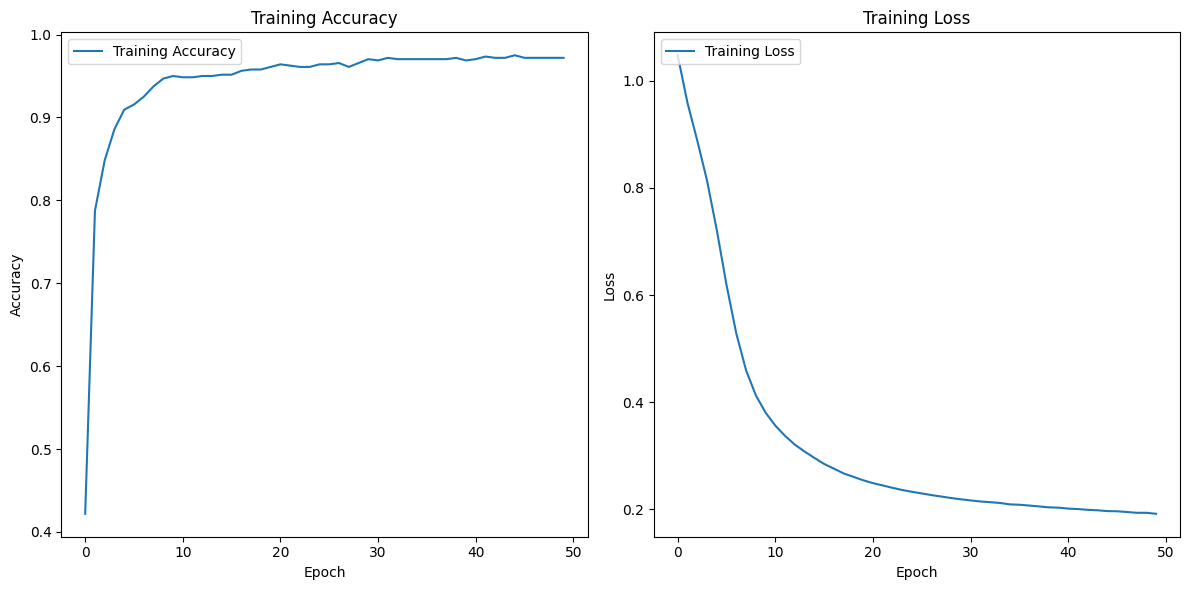

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc, test_auc, test_precision, test_recall = ann.evaluate(X_test, y_test, verbose=0)

# Print the metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


Test Loss: 0.2208
Test Accuracy: 0.9700
Test AUC: 0.9626
Test Precision: 0.9810
Test Recall: 0.9943


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) # printing the Confusion matrix

[[ 91   4]
 [  2 103]]


0.97

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


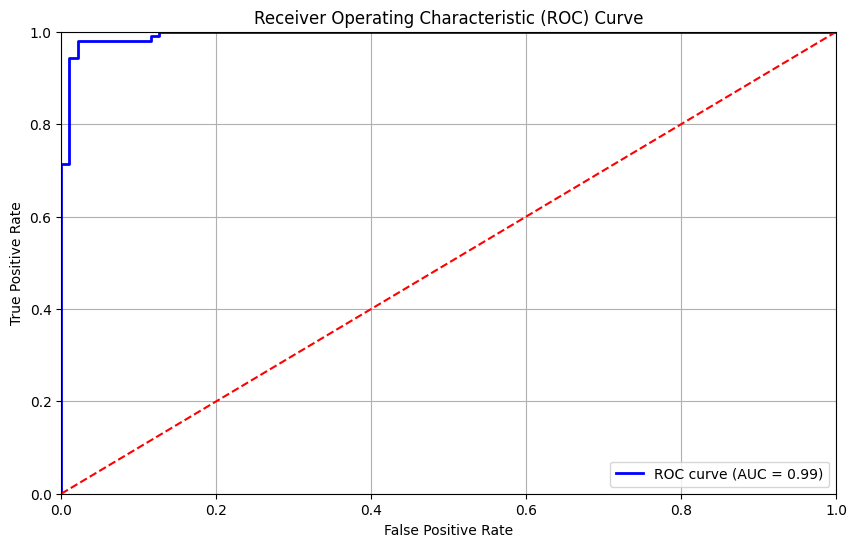

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = y_test  # Actual labels for the test set
y_scores = best_models[3].predict(X_test)  # Predicted probabilities

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import joblib
model = joblib.load('heart_disease_model.pkl')
import numpy as np

# Example input data
features = pd.DataFrame([25, 0, 0, 110, 180, 0, 0, 180, 0, 0.0, 1, 0])

# Convert to a numpy array and reshape it to match the model input shape (1 row, n features)
input_data = np.array(features).reshape(1, -1)
# Loading Scaler
scaler = sc

# Scale the input data
scaled_data = scaler.transform(input_data)

# Get the percentage of input being class 1
prediction = model.predict(scaled_data)
print(f"Prediction: {prediction}")


Input data before scaling: [[ 25.   0.   0. 110. 180.   0.   0. 180.   0.   0.   1.   0.]]
Input data after scaling: [[-1.39157295 -1.82327297 -1.05328975 -1.39763438 -1.01469909 -0.67419986
  -0.97641683  1.02613949 -1.01765584 -1.58824718 -0.55960841 -1.26648376]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: [[0.00047776]]


In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(sc, 'sc.pkl')


['sc.pkl']

In [ ]:
!pip install shap

In [ ]:
import joblib
import shap  # For generating SHAP values to explain model predictions
# Load the ANN model and scaler
model = joblib.load('heart_disease_model.pkl')
scaler = joblib.load('sc.pkl')


In [ ]:
# Define background data for SHAP explanations
# Using the background data SHAP simulated how features influence predictions
# First 100 samples have been chosen as background data
background_data = X_train[:100]

# Initialize a SHAP KernelExplainer
# The explainer uses the model's prediction function and the background data to calculate SHAP values
explainer = shap.KernelExplainer(model.predict, background_data)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [ ]:
# Example input data
# Scaling the data similar to how it was scaled during training
# This ensures the input features match the scale expected by the model
new_data = np.array([25, 0, 0, 110, 180, 0, 0, 180, 0, 0.0, 1, 0]).reshape(1, -1)
scaled_data = scaler.transform(new_data)

# Generate SHAP values for the new prediction
# SHAP values indicate the importance of each feature towards a prediction
shap_values = explainer.shap_values(scaled_data)


In [ ]:
age: 0.080529901836193
gender: -0.013697637030930838
chestpain: -0.03548005675454579
restingBP: 0.00815727852364506
serumcholesterol: 0.0016303060163143897
fastingbloodsugar: -0.0036489412264027027
restingrelectro: -0.002764653438595392
maxheartrate: 0.12199858674008923
exerciseangina: -0.00522851304549981
oldpeak: 0.02791413931905736
slope: -0.16956624972338255
noofmajorvessels: -0.00936639663507749